In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
uploaded=files.upload()

Saving sign_mnist_train.zip to sign_mnist_train.zip
Saving sign_mnist_test.zip to sign_mnist_test.zip


In [4]:
!unzip sign_mnist_train.zip
!unzip sign_mnist_test.zip

Archive:  sign_mnist_train.zip
  inflating: sign_mnist_train.csv    
Archive:  sign_mnist_test.zip
  inflating: sign_mnist_test.csv     


In [5]:
!ls

sample_data	     sign_mnist_test.zip   sign_mnist_train.zip
sign_mnist_test.csv  sign_mnist_train.csv


In [17]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    fields = [] 
    rows = [] 
    with open(filename) as training_file:
      csvreader=csv.reader(training_file)
      for row in csvreader:
        rows.append(row)
      labels=[i[0]for i in rows[1:]]
      images=[i[1:]for i in rows[1:]]
      images=np.reshape(np.array(images),(len(images),28,28))
      labels=np.reshape(np.array(labels),(len(labels),))
      
        
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [19]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.reshape(training_images,(training_images.shape[0],training_images.shape[1],training_images.shape[2],1))
testing_images = np.reshape(testing_images,(testing_images.shape[0],testing_images.shape[1],testing_images.shape[2],1))

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=False,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale=1/255.0)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [34]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(26,activation='softmax')
])

# Compile Model. 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images,training_labels,batch_size=32),
                              epochs=25,
                              validation_data=validation_datagen.flow(testing_images,testing_labels,batch_size=32),
                              verbose=2)

Epoch 1/25
858/858 - 11s - loss: 2.5451 - acc: 0.2140 - val_loss: 1.3498 - val_acc: 0.5609
Epoch 2/25
858/858 - 10s - loss: 1.6377 - acc: 0.4696 - val_loss: 0.8626 - val_acc: 0.6799
Epoch 3/25
858/858 - 10s - loss: 1.2281 - acc: 0.5992 - val_loss: 0.6376 - val_acc: 0.7766
Epoch 4/25
858/858 - 10s - loss: 0.9920 - acc: 0.6700 - val_loss: 0.5412 - val_acc: 0.8250
Epoch 5/25
858/858 - 10s - loss: 0.8466 - acc: 0.7190 - val_loss: 0.3437 - val_acc: 0.8812
Epoch 6/25
858/858 - 10s - loss: 0.7293 - acc: 0.7576 - val_loss: 0.3537 - val_acc: 0.8751
Epoch 7/25
858/858 - 10s - loss: 0.6393 - acc: 0.7821 - val_loss: 0.2827 - val_acc: 0.8996
Epoch 8/25
858/858 - 10s - loss: 0.5859 - acc: 0.8041 - val_loss: 0.2243 - val_acc: 0.9247
Epoch 9/25
858/858 - 10s - loss: 0.5315 - acc: 0.8241 - val_loss: 0.1913 - val_acc: 0.9274
Epoch 10/25
858/858 - 10s - loss: 0.4943 - acc: 0.8342 - val_loss: 0.1801 - val_acc: 0.9336
Epoch 11/25
858/858 - 10s - loss: 0.4550 - acc: 0.8473 - val_loss: 0.1603 - val_acc: 0.93

[6.92426086682151, 0.56609035]

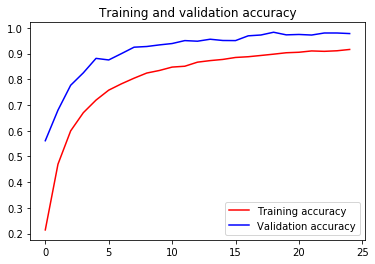

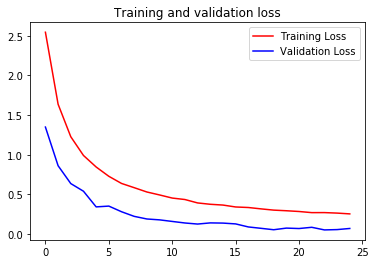

In [36]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()